## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [121]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [20]:
df.nunique()[0]

290584

d. The proportion of users converted.

In [6]:
# Since the unconverted marked with 0's and converted with 1's
# We could use mean to calculate converted users proportion.
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [26]:
# Calculate how many tratment or new_page appears without each other
df.query("group=='treatment' and landing_page=='old_page' or group=='control' and landing_page=='new_page'").shape[0]

3893

f. Do any of the rows have missing values?

In [28]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [24]:
df2=df.query("group=='treatment' and landing_page=='new_page' or group=='control' and landing_page=='old_page'")
print(df2.shape[0])
df2.head()

290585


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query("user_id==773192")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.drop(index=2893)
df2[df2.duplicated(['user_id'])]['user_id']

Series([], Name: user_id, dtype: int64)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.query("converted==1").shape[0]/df2.shape[0]

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [89]:
df2.query("group=='control' and converted==1").shape[0]/df2.query("group=='control'").shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [90]:
df2.query("group=='treatment' and converted==1").shape[0]/df2.query("group=='treatment'").shape[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [113]:
df2.query("landing_page=='new_page'").shape[0]/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

   Since the prbability of the user receiving eaither of the pages is 50% we consider the results we concluded earlier as evidence.
 The users who recieved the `old_page` were more likely to convert by 0.120% than those who recicved the `new_page` whom has 0.118% to convert.
 So, The `old_page` has slightly better convesion rate by 0.002% which is not consedrable margin. So, we can't say which is better.
 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Our null hypothesis or what we assumed to be true, which is `old_page` has higher or equal conversion rate than the `new_page`:
$$ H0: P_{old} >= P_{new} $$

........................................................................................................................................................

And our alternative hypothesis or the hypothesis that we want to prove to be true, which is `new_page` has higher conversion rate than `old_page`:
$$ H1: P_{new} > P_{old} $$



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [29]:
p_new=df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old=df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [32]:
n_new=df2.query("group=='treatment'").shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [33]:
n_old=df2.query("group=='control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [47]:
new_page_converted=np.random.choice([1,0],n_new)
new_page_converted

array([0, 0, 1, ..., 1, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
old_page_converted=np.random.choice([1,0],n_old)
old_page_converted

array([1, 1, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
new_page_converted.mean()-old_page_converted.mean()

0.000739655869765099

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [57]:
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.choice([1,0],n_new)
    old_page_converted=np.random.choice([1,0],n_old)
    diff=new_page_converted.mean()-old_page_converted.mean()
    p_diffs=np.concatenate((p_diffs, [diff]))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

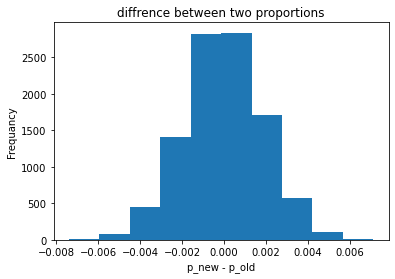

In [112]:
plt.hist(p_diffs)
plt.title("diffrence between two proportions")
plt.xlabel("p_new - p_old")
plt.ylabel("Frequancy");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [92]:
# Calculate the actual propotion diffrence 
act_p_diffs=df2.query("group=='treatment'")["converted"].mean()-df2.query("group=='control'")["converted"].mean()
# Then we calculate the propotion of (p_diffs > act_p_diffs) 
(p_diffs > act_p_diffs).mean()

0.8036

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<h5>
    I calculated the p_value which equale to "(null_vals > obs_statistic).mean()"    <br>
   and our alpha value is 5%.
<br></h5>
We reject the null hypothesis if:
$$p\_value < {\alpha}$$ 
And accept it if the:
$$p\_value > {\alpha}$$

<p>Since our p_value is higher than our &alpha;:</p>
$$ 0.804 > 0.05 $$ 


So, we concluded that the old_page has higher or equal converted rate than the new_page.




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [98]:
import statsmodels.api as sm

convert_old = df.query("group=='control' and converted==1").shape[0]
convert_new = df.query("group=='treatment' and converted==1").shape[0]
n_old = df2.query("group=='control'").shape[0]
n_new = df2.query("group=='treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [115]:
# We calculate the z_score and the p_value for the z-test
z_score, p_value=sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score,p_value

(1.213226084696041, 0.22504339380812777)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**To tell that we need to calculate the z_score significance percentage and the critical value of our error rate**

In [117]:
# Calculate z_score percentage
norm.cdf(z_score)

0.8874783030959361

In [120]:
# Calculate confidance intervals with 5% type I error rate
norm.ppf(1-0.05)

1.6448536269514722

**Since confidance interval is larger than the z-score percentage, we couldn't reject the null hypothesis.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [128]:
# Create an intercept column which always equals to 1.
df2['intercept'] = 1
# Create a dummy variable which equals to 1 when individual receives the treatment and 0 if control.
df2['ab_page']=pd.get_dummies(df["group"])["treatment"];

df2.head()

<ipython-input-128-2ef2961a2a08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
<ipython-input-128-2ef2961a2a08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page']=pd.get_dummies(df["group"])["treatment"];


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [165]:
# Calculate every time ab_page and converted matched
model_1=sm.Logit(df2['converted'],df2[['intercept','ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [134]:
# Create a logistic reggresion model for the converted customers in each country
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:               8.085e-06
Time:                        22:45:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**p_value=0.19**
it's diffrent from part II null and alternative hypothesises p_value. Due to adding ab_page and intercept columns, we have new hypothesises.
<br><br>
Our new null hypothesis or what we assumed to be true, which is `old_page` has equal conversion rate to the `new_page`:
$$ H0: P_{old} = P_{new} $$



And our new alternative hypothesis or the hypothesis that we want to prove to be true, which is `new_page` has unequal conversion rate to the `old_page`:
$$ H1: P_{new} != P_{old} $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea because, we will have more fields to search.
<br>We might add also indivisual's age and salary to have clear view. 
<br>Even though it has disadvantages and Interpretion might be harder due to, correlated parameters (Multicollinearity).**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [246]:
# Reading countries.csv
df_countries=pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [247]:
# Figuring out countries we have
df_countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [248]:
# Merging countries dataset with our main dataset
df_merged=pd.merge(df2, df_countries, on="user_id")
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [249]:
# Creating dummy variables for the countries
df_merged=pd.get_dummies(df_merged, columns=["country"],prefix='',prefix_sep='')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,0,1


In [251]:
# Create a logistic reggresion model for the converted customers in each country
df_merged['intercept']=1
logit_mod=sm.Logit(df_merged['converted'], df_merged[['intercept','UK','CA']])
model_2=logit_mod.fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:               1.521e-05
Time:                        21:38:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

**CA coeffetient is neagative and UK coeffetient is positive that means, the order of the countries by their conversion rates is:
<br>1- United Kingdom.
<br>2- United States.
<br>3- Canada.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [257]:
# Create a new variable refers to the indivisula who recieved a new page and converted
df_merged["ab_converted"]=(df_merged["converted"]&df_merged["ab_page"])

In [258]:
# Create a logistic reggresion model for the converted customers who recieved new page in each country 
logit_mod = sm.Logit(df_merged['ab_converted'],df_merged[['intercept','UK','CA']])
model_3 = logit_mod.fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.225338
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           ab_converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Aug 2021   Pseudo R-squ.:               2.843e-05
Time:                        21:49:20   Log-Likelihood:                -65480.
converged:                       True   LL-Null:                       -65482.
Covariance Type:            nonrobust   LLR p-value:                    0.1554
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7642      0.009   -294.575      0.000      -2.783      -2.746
UK             0.0193      0.018      1.061      0.289      -0.016       0.055
CA            -0.0539      0.037     -1.450      0.147      -0.127       0.019
==============================================================================
"""

**CA coeffetient is neagative and UK coeffetient is positive that means, the order of the countries by their conversion rates if they recieve new page is:
<br>1- United Kingdom.
<br>2- United States.
<br>3- Canada.**

<a id='conclusions'></a>
## Conclusions
In this project we analyzed new and old page performances, we used three ways to determine which page has the highest performance. and from these analyses we showd that the old page has higher or equal performance to the new page.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])